In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import cv2
import time

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
import torchvision.models as models
from tqdm import tqdm_notebook

dataset_root = "./data/fashion_pt" 
Dataset = FashionMNIST

## Data

In [31]:
# Prepare data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = Dataset(dataset_root, download=True, train=True, transform=transform)
testset = Dataset(dataset_root, download=True, train=False, transform=transform)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)

In [32]:
# Create data loaders

batch_size = 64

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

Class: Sneaker
Shape: (1, 28, 28)


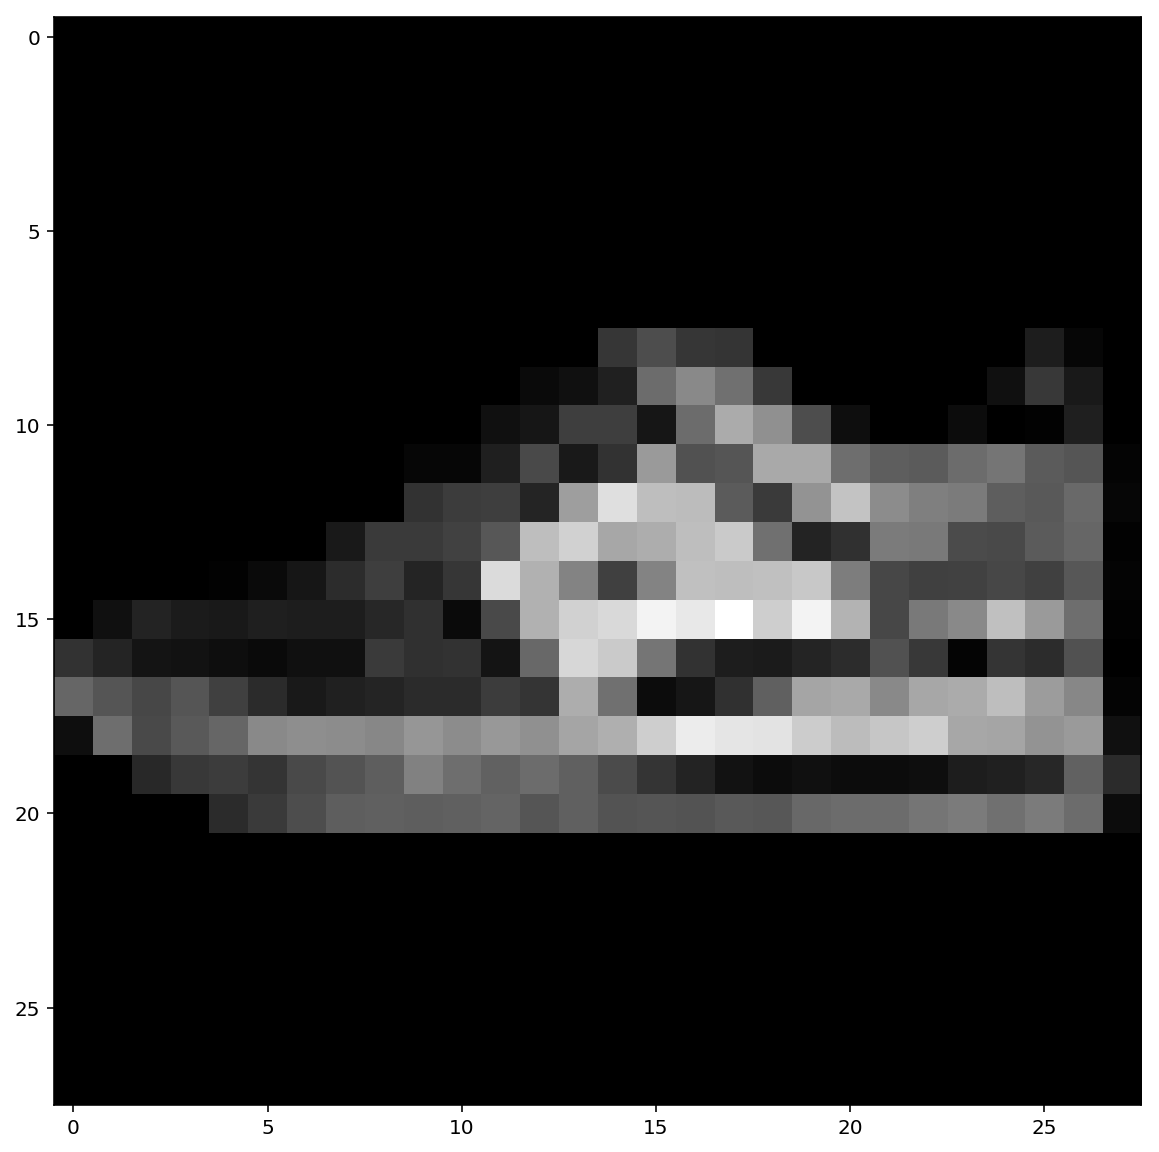

In [33]:
# Show random image shape using iterator

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

idx = np.random.choice(batch_size)
plt.imshow(np.squeeze(images[idx]), cmap='gray')
print('Class: ' + str(classes[labels[idx]]))
print('Shape: ' + str(images[idx].shape))

In [34]:
def to_3_channels(one_channel_img):
    return np.vstack((one_channel_img, one_channel_img, one_channel_img))

colorimage = to_3_channels(images[idx])
print(images[idx].shape)
print(colorimage.shape)

(1, 28, 28)
(3, 28, 28)


In [35]:
def to_3_channels_batch(one_channel_img_batch):
    return np.hstack((one_channel_img_batch, one_channel_img_batch,one_channel_img_batch))

In [36]:
def to_3_channels_tensor_batch(one_channel_tensor_batch):
    return torch.squeeze(torch.stack([one_channel_tensor_batch, one_channel_tensor_batch, one_channel_tensor_batch], dim=1))

batch = next(iter(test_loader))
print(batch[0].size())
batch_3_channels = to_3_channels_batch(batch[0])
print(torch.from_numpy(batch_3_channels).size())

torch.Size([64, 1, 28, 28])
torch.Size([64, 3, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

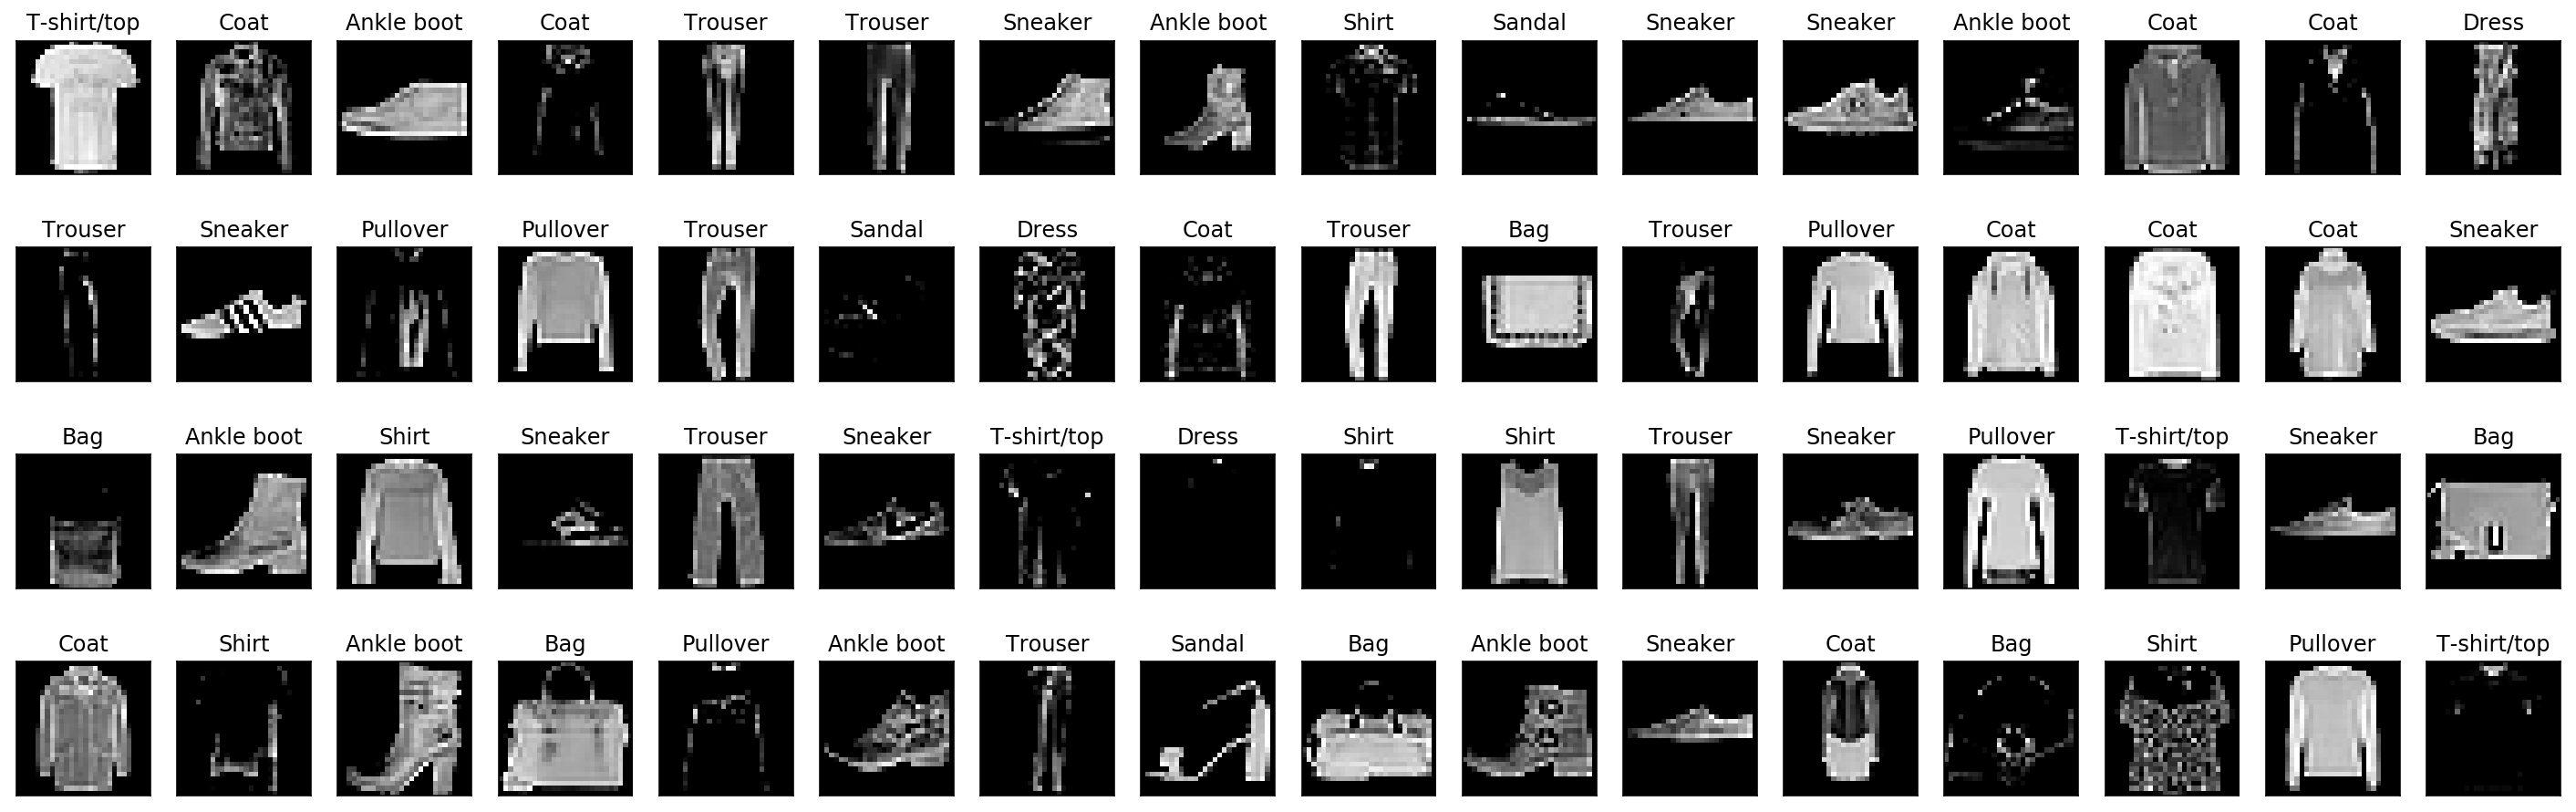

In [37]:
# Show full batch size

fig = plt.figure(figsize=(25, 8))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(4, batch_size/4, idx+1, xticks=[], yticks=[])
    ax.imshow(np.moveaxis(to_3_channels(images[idx]), 0, -1))
    ax.set_title(classes[labels[idx]])

In [38]:
# instantiate and print your pretrained network
net = models.vgg11(pretrained = True)
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [39]:
classifier_childs = list(net.classifier.children())
print(classifier_childs)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=1000, bias=True)]


In [40]:
classifier_childs.pop()
print(classifier_childs)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5)]


In [41]:
classifier_childs.append(torch.nn.Linear(4096, num_classes))
print(classifier_childs)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=10, bias=True)]


In [42]:
new_classifier = torch.nn.Sequential(*classifier_childs)
print(new_classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


In [43]:
net.classifier = new_classifier

In [44]:
# Add batch size using unsqueeze to obtain a single example batch with 3 channels

print(images[idx].shape)
img_pt = torch.from_numpy(to_3_channels(images[idx])).unsqueeze(0)
print(img_pt.shape)

(1, 28, 28)
torch.Size([1, 3, 28, 28])


In [45]:
# Calculate predictions for one sample image
output = net(img_pt)
output.size()

torch.Size([1, 10])

In [46]:
# Define learning rate, loss function and optimizer

learning_rate = 0.0001

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [47]:
# Calculate accuracy before training
correct = 0
total = 0
net.eval()
for images, labels in tqdm_notebook(test_loader):

    outputs = net(to_3_channels_tensor_batch(images))
    
    _, predicted = torch.max(outputs.data, 1) # output -> value, index

    total += labels.size(0)
    correct += (predicted == labels).sum()

accuracy = 100.0 * correct.item() / total

accuracy

9.65

In [48]:
# Freeze all layers

for param in net.parameters():
    param.requires_grad = False

In [49]:
# Unfreeze last linear layer

net.classifier[-1].weight.requires_grad = True
net.classifier[-1].bias.requires_grad = True

In [85]:
# Train loop

print_every = 100

def train(n_epochs):
    net.train()
    loss_over_time = [] # to track the loss as the network trains
    start_time = time.time()
    for epoch in tqdm_notebook(range(n_epochs)):  # loop over the dataset multiple times
        
        running_loss = 0.0
        
        for batch_i, data in enumerate(tqdm_notebook(train_loader)):
            # get the input images and their corresponding labels
            inputs, labels = data

            # zero the parameter (weight) gradients
            optimizer.zero_grad()

            # forward pass to get outputs
            outputs = net(to_3_channels_tensor_batch(inputs))

            # calculate the loss
            loss = criterion(outputs, labels)

            # backward pass to calculate the parameter gradients
            loss.backward()

            # update the parameters
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to running_loss, we use .item()
            running_loss += loss.item()
            
            if batch_i % print_every == print_every//2:    # print every 100 batches (staring from 50)
                avg_loss = running_loss/print_every
                # record and print the avg loss over the 100 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}, Time: {}'.format(epoch + 1, batch_i+1, avg_loss, str(time.time() - start_time)))
                running_loss = 0.0
                start_time = time.time()


    print('Finished Training')
    return loss_over_time


In [51]:
# Train the model

n_epochs = 2 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1, Batch: 51, Avg. Loss: 0.952983375787735, Time: 16.411974906921387
Epoch: 1, Batch: 151, Avg. Loss: 1.2457303810119629, Time: 32.27462673187256
Epoch: 1, Batch: 251, Avg. Loss: 0.994368531703949, Time: 30.78066611289978
Epoch: 1, Batch: 351, Avg. Loss: 0.8919906759262085, Time: 30.757994890213013
Epoch: 1, Batch: 451, Avg. Loss: 0.8432913655042649, Time: 30.7145938873291
Epoch: 1, Batch: 551, Avg. Loss: 0.800922259092331, Time: 30.75218892097473
Epoch: 1, Batch: 651, Avg. Loss: 0.7794755774736405, Time: 30.884361028671265
Epoch: 1, Batch: 751, Avg. Loss: 0.7519973397254944, Time: 31.075777053833008
Epoch: 1, Batch: 851, Avg. Loss: 0.7392487263679505, Time: 30.957499980926514
Epoch: 2, Batch: 51, Avg. Loss: 0.36701267331838605, Time: 44.21820068359375
Epoch: 2, Batch: 151, Avg. Loss: 0.7068804940581321, Time: 30.878294944763184
Epoch: 2, Batch: 251, Avg. Loss: 0.7159723275899887, Time: 30.875747203826904
Epoch: 2, Batch: 351, Avg. Loss: 0.7106354162096977, Time: 30.792688846588

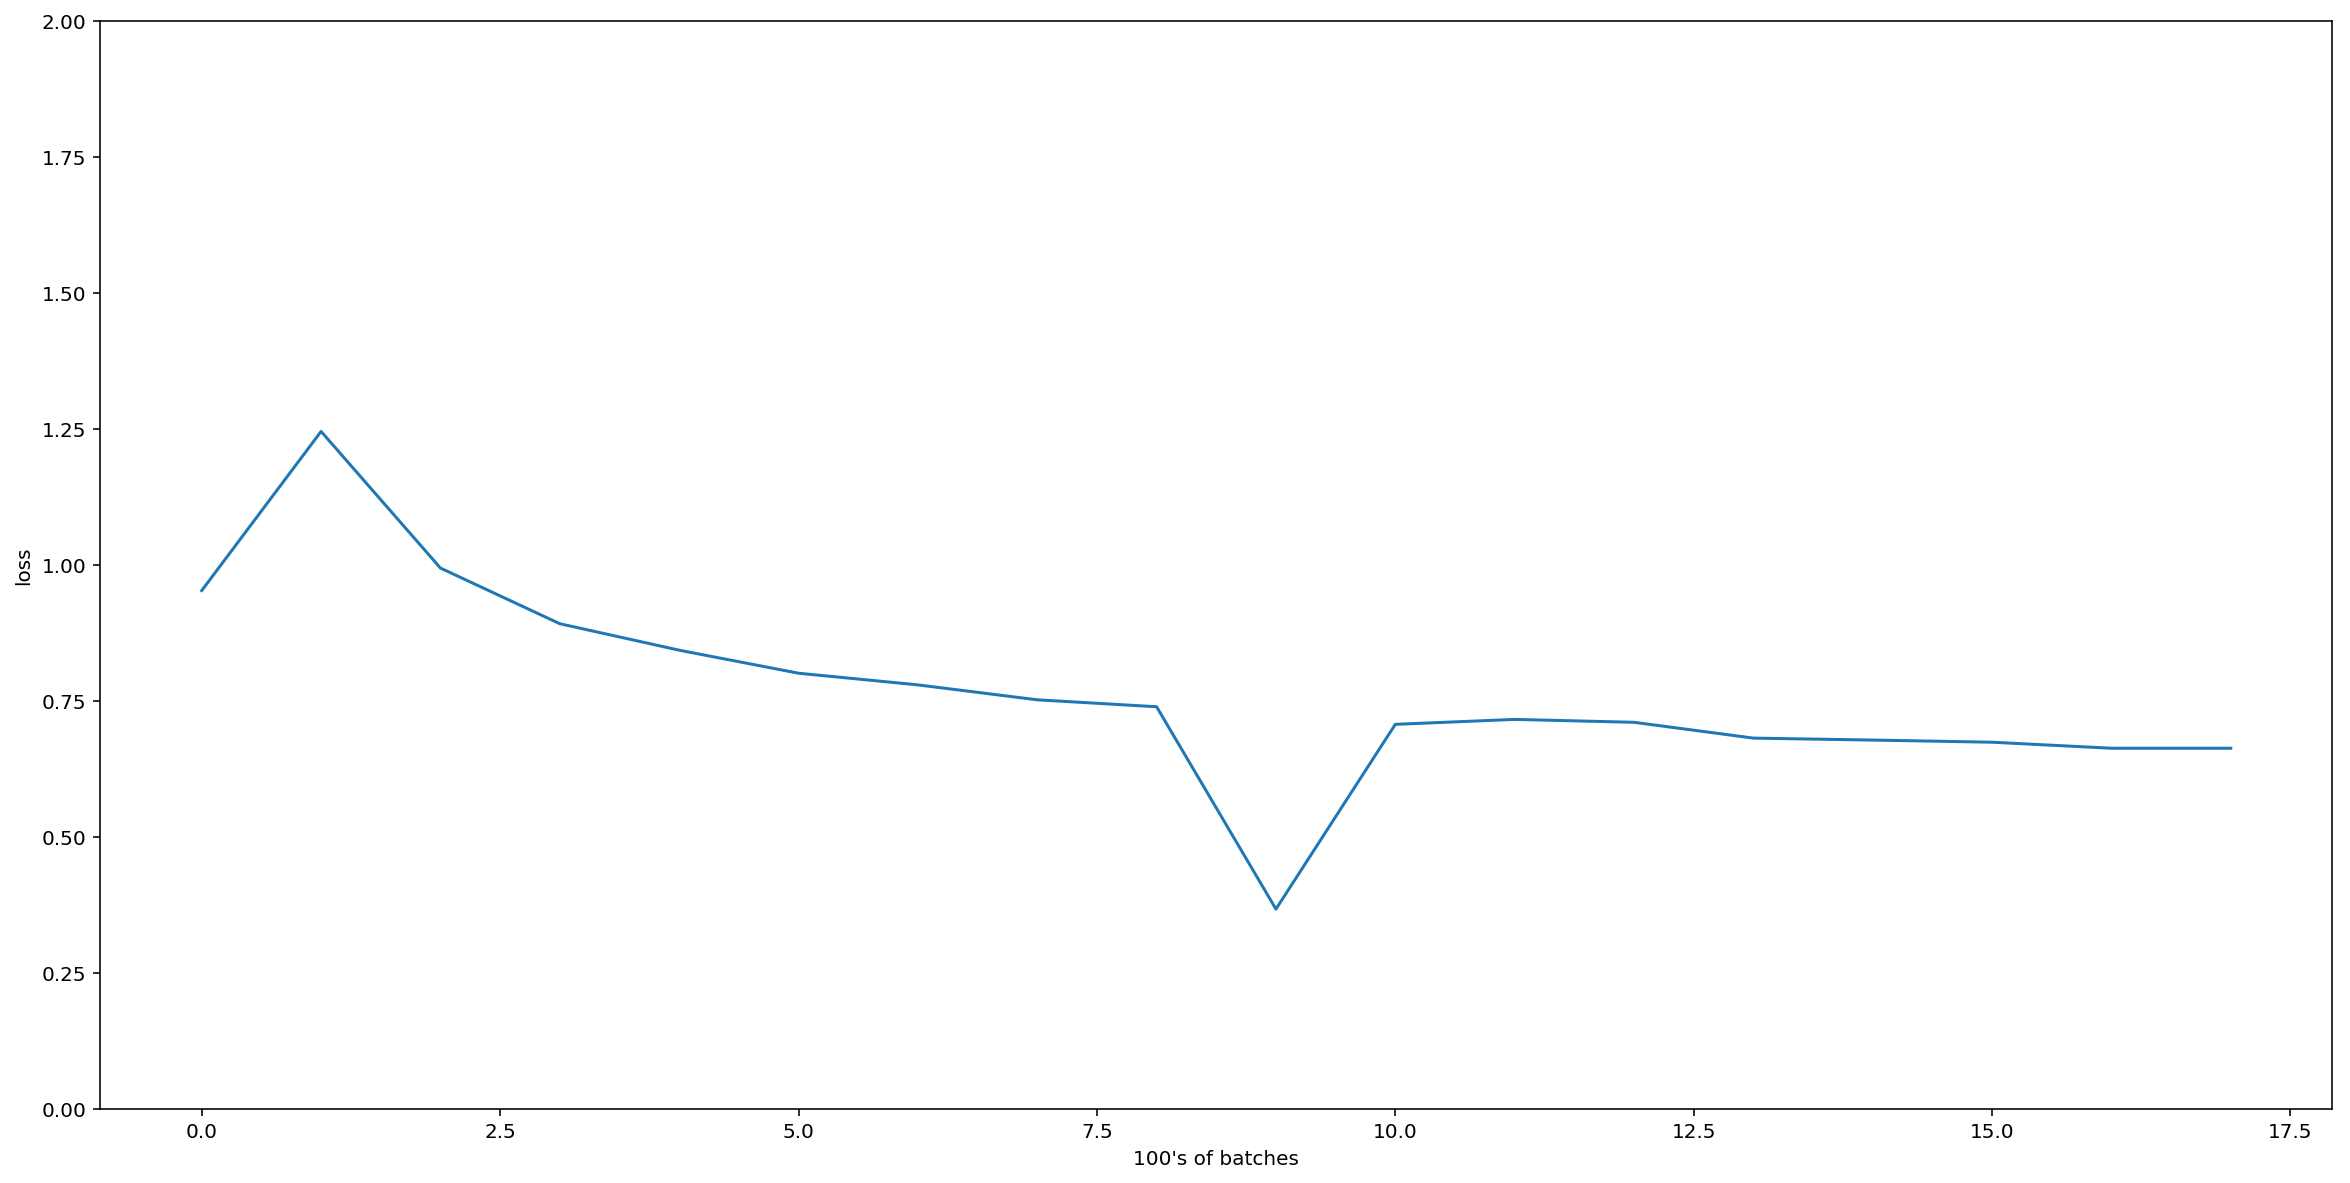

In [52]:
# Show training loss

plt.plot(training_loss)
plt.xlabel('100\'s of batches')
plt.ylabel('loss')
plt.ylim(0, 2.0) # consistent scale
plt.show()

In [53]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.642669

Test Accuracy of T-shirt/top: 72% (43/59)
Test Accuracy of Trouser: 95% (60/63)
Test Accuracy of Pullover: 71% (58/81)
Test Accuracy of Dress: 78% (52/66)
Test Accuracy of  Coat: 75% (59/78)
Test Accuracy of Sandal: 89% (60/67)
Test Accuracy of Shirt: 37% (24/64)
Test Accuracy of Sneaker: 75% (59/78)
Test Accuracy of   Bag: 90% (79/87)
Test Accuracy of Ankle boot: 91% (75/82)

Test Accuracy (Overall): 78% (569/725)


torch.Size([64, 3, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

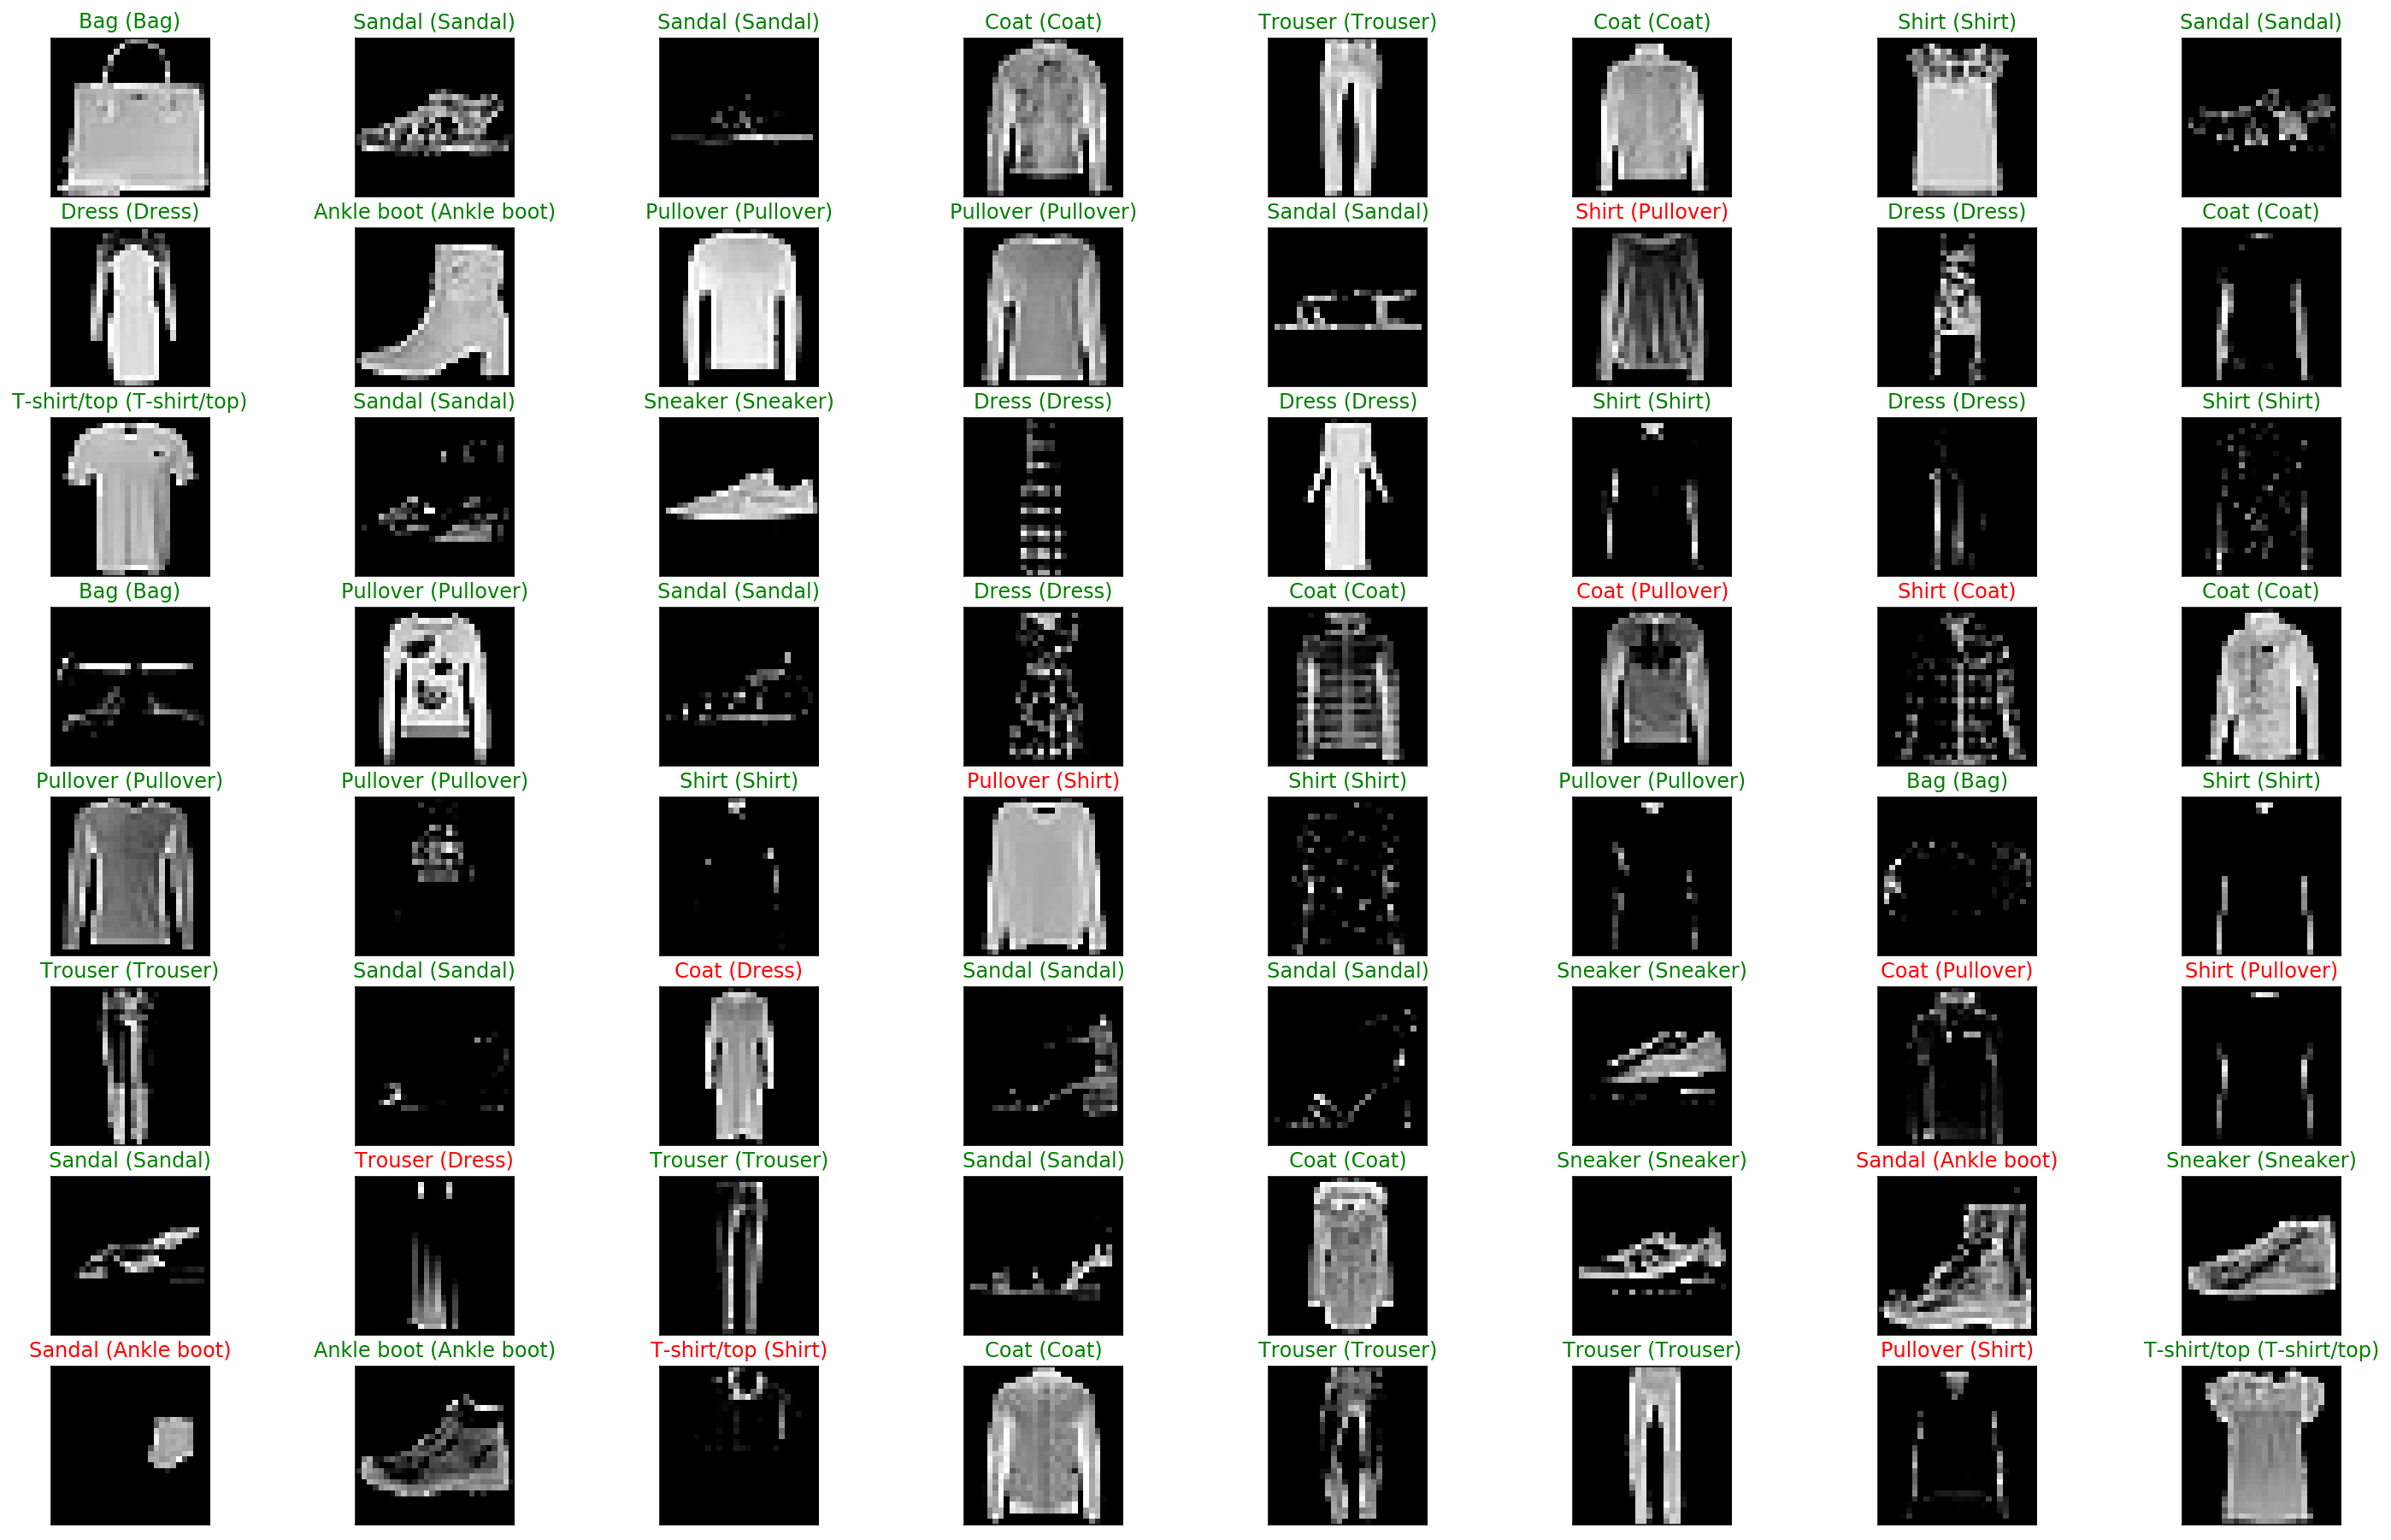

In [65]:
# obtain one batch of test images with its predictions

dataiter = iter(test_loader)
images, labels = dataiter.next()

images = to_3_channels_tensor_batch(images)
# get predictions
print(images.shape)
preds = np.squeeze(net(images).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 16))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(8, batch_size/8, idx+1, xticks=[], yticks=[])
    ax.imshow(np.moveaxis(images[idx], 0, -1))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Exercise: Unfreeze classifier

Does the model improve training all classifier and not just the last layer? What about the time it takes to train?
 

In [67]:
# Freeze all layers

for param in net.parameters():
    param.requires_grad = False

In [71]:
for param in net.classifier.parameters():
    param.requires_grad = True

In [76]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 1 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1, Batch: 51, Avg. Loss: 0.3311812335252762, Time: 74.3021330833435
Epoch: 1, Batch: 151, Avg. Loss: 0.6025819826126099, Time: 142.51006197929382
Epoch: 1, Batch: 251, Avg. Loss: 0.5986082208156586, Time: 146.15912008285522
Epoch: 1, Batch: 351, Avg. Loss: 0.5503476548194886, Time: 140.81286311149597
Epoch: 1, Batch: 451, Avg. Loss: 0.5885049650073051, Time: 141.40497159957886
Epoch: 1, Batch: 551, Avg. Loss: 0.5505235376954078, Time: 142.57299494743347
Epoch: 1, Batch: 651, Avg. Loss: 0.5325913470983505, Time: 146.13416504859924
Epoch: 1, Batch: 751, Avg. Loss: 0.5250328752398491, Time: 154.78411602973938
Epoch: 1, Batch: 851, Avg. Loss: 0.5252863627672195, Time: 160.77405071258545
Finished Training


# Exercise: Unfreeze all

Does the model improve training all layers and not just the classifier? What about the time it takes to train?
 

In [78]:
# Unfreeze all layers

for param in net.parameters():
    param.requires_grad = True

In [80]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 2 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1, Batch: 51, Avg. Loss: 0.17541855975985526, Time: 100.41388177871704
Epoch: 1, Batch: 151, Avg. Loss: 0.3087364982068539, Time: 196.20486187934875
Epoch: 1, Batch: 251, Avg. Loss: 0.3083192994445562, Time: 196.03922820091248
Epoch: 1, Batch: 351, Avg. Loss: 0.30302109822630885, Time: 196.88042497634888
Epoch: 1, Batch: 451, Avg. Loss: 0.2783051795512438, Time: 198.7321228981018
Epoch: 1, Batch: 551, Avg. Loss: 0.2781338610500097, Time: 197.4989719390869
Epoch: 1, Batch: 651, Avg. Loss: 0.2628958982601762, Time: 201.23537302017212
Epoch: 1, Batch: 751, Avg. Loss: 0.2573567286878824, Time: 208.5003318786621
Epoch: 1, Batch: 851, Avg. Loss: 0.25602569736540315, Time: 211.80293488502502
Epoch: 2, Batch: 51, Avg. Loss: 0.11631193548440934, Time: 293.9145450592041
Epoch: 2, Batch: 151, Avg. Loss: 0.21081451900303363, Time: 217.2231547832489
Epoch: 2, Batch: 251, Avg. Loss: 0.21497988782823085, Time: 214.51615405082703
Epoch: 2, Batch: 351, Avg. Loss: 0.21402260795235634, Time: 214.8

In [81]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.256327

Test Accuracy of T-shirt/top: 82% (60/73)
Test Accuracy of Trouser: 98% (68/69)
Test Accuracy of Pullover: 89% (67/75)
Test Accuracy of Dress: 88% (62/70)
Test Accuracy of  Coat: 96% (76/79)
Test Accuracy of Sandal: 98% (59/60)
Test Accuracy of Shirt: 60% (40/66)
Test Accuracy of Sneaker: 100% (76/76)
Test Accuracy of   Bag: 98% (66/67)
Test Accuracy of Ankle boot: 96% (91/94)

Test Accuracy (Overall): 91% (665/729)


# Exercise: Train the model without using pretrained weigths 

In [84]:
net = models.vgg11(pretrained = False)


In [86]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 2 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1, Batch: 51, Avg. Loss: 1.7476546788215637, Time: 110.08670616149902
Epoch: 1, Batch: 151, Avg. Loss: 1.7701029908657073, Time: 214.48984813690186
Epoch: 1, Batch: 251, Avg. Loss: 0.9125326055288315, Time: 205.56420612335205
Epoch: 1, Batch: 351, Avg. Loss: 0.7125151863694191, Time: 206.04426980018616
Epoch: 1, Batch: 451, Avg. Loss: 0.6193944385647774, Time: 206.27066707611084
Epoch: 1, Batch: 551, Avg. Loss: 0.5526882046461106, Time: 206.79019284248352
Epoch: 1, Batch: 651, Avg. Loss: 0.5164198008179665, Time: 268.411572933197
Epoch: 1, Batch: 751, Avg. Loss: 0.4919678084552288, Time: 363.78009390830994
Epoch: 1, Batch: 851, Avg. Loss: 0.4616780750453472, Time: 414.281121969223


Epoch: 2, Batch: 51, Avg. Loss: 0.20271821543574334, Time: 547.0690507888794
Epoch: 2, Batch: 151, Avg. Loss: 0.3970441357791424, Time: 383.32591104507446
Epoch: 2, Batch: 251, Avg. Loss: 0.3691739873588085, Time: 382.4793019294739
Epoch: 2, Batch: 351, Avg. Loss: 0.36189624294638634, Time: 381.28129625320435
Epoch: 2, Batch: 451, Avg. Loss: 0.3525582395493984, Time: 383.3437509536743
Epoch: 2, Batch: 551, Avg. Loss: 0.34837440386414525, Time: 386.0731031894684
Epoch: 2, Batch: 651, Avg. Loss: 0.33499962732195854, Time: 386.25641083717346
Epoch: 2, Batch: 751, Avg. Loss: 0.3330428908020258, Time: 388.988126039505
Epoch: 2, Batch: 851, Avg. Loss: 0.3351287180930376, Time: 386.8991599082947
Finished Training


In [88]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.268804

Test Accuracy of T-shirt/top: 86% (39/45)
Test Accuracy of Trouser: 98% (74/75)
Test Accuracy of Pullover: 88% (68/77)
Test Accuracy of Dress: 94% (83/88)
Test Accuracy of  Coat: 91% (74/81)
Test Accuracy of Sandal: 94% (79/84)
Test Accuracy of Shirt: 67% (44/65)
Test Accuracy of Sneaker: 100% (64/64)
Test Accuracy of   Bag: 97% (66/68)
Test Accuracy of Ankle boot: 98% (75/76)

Test Accuracy (Overall): 92% (666/723)


In [89]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 3 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

Epoch: 1, Batch: 51, Avg. Loss: 0.0877839259058237, Time: 105.2000641822815
Epoch: 1, Batch: 151, Avg. Loss: 0.1756487362831831, Time: 205.96824669837952
Epoch: 1, Batch: 251, Avg. Loss: 0.18171467211097478, Time: 204.87352013587952
Epoch: 1, Batch: 351, Avg. Loss: 0.16451214019209146, Time: 205.0185408592224
Epoch: 1, Batch: 451, Avg. Loss: 0.18032613825052976, Time: 204.5181529521942
Epoch: 1, Batch: 551, Avg. Loss: 0.17845447927713395, Time: 205.13788485527039
Epoch: 1, Batch: 651, Avg. Loss: 0.1745074313879013, Time: 205.7696409225464
Epoch: 1, Batch: 751, Avg. Loss: 0.18339876402169467, Time: 209.09862089157104
Epoch: 1, Batch: 851, Avg. Loss: 0.1677523721009493, Time: 211.4847011566162


Epoch: 2, Batch: 51, Avg. Loss: 0.06867265239357949, Time: 292.9195330142975
Epoch: 2, Batch: 151, Avg. Loss: 0.13853050637990236, Time: 214.76901292800903
Epoch: 2, Batch: 251, Avg. Loss: 0.14718957390636206, Time: 216.81925225257874
Epoch: 2, Batch: 351, Avg. Loss: 0.1517881340906024, Time: 216.88886284828186
Epoch: 2, Batch: 451, Avg. Loss: 0.1526210719347, Time: 218.67971897125244
Epoch: 2, Batch: 551, Avg. Loss: 0.15089111730456353, Time: 221.80525994300842
Epoch: 2, Batch: 651, Avg. Loss: 0.15585703831166028, Time: 222.2988851070404
Epoch: 2, Batch: 751, Avg. Loss: 0.150319098867476, Time: 222.408607006073
Epoch: 2, Batch: 851, Avg. Loss: 0.15757767651230098, Time: 222.24060797691345


Epoch: 3, Batch: 51, Avg. Loss: 0.06992846064269542, Time: 308.55680799484253
Epoch: 3, Batch: 151, Avg. Loss: 0.11949454467743635, Time: 227.63817691802979
Epoch: 3, Batch: 251, Avg. Loss: 0.12455404505133628, Time: 227.37812876701355
Epoch: 3, Batch: 351, Avg. Loss: 0.1317038368433714, Time: 228.99200892448425
Epoch: 3, Batch: 451, Avg. Loss: 0.1174656992405653, Time: 231.2925021648407
Epoch: 3, Batch: 551, Avg. Loss: 0.13190619472414256, Time: 230.24483823776245
Epoch: 3, Batch: 651, Avg. Loss: 0.12830493673682214, Time: 229.98553228378296
Epoch: 3, Batch: 751, Avg. Loss: 0.13051964357495308, Time: 230.4390640258789
Epoch: 3, Batch: 851, Avg. Loss: 0.13162345699965955, Time: 231.43965601921082
Finished Training


In [90]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.287221

Test Accuracy of T-shirt/top: 80% (34/42)
Test Accuracy of Trouser: 98% (77/78)
Test Accuracy of Pullover: 95% (64/67)
Test Accuracy of Dress: 95% (63/66)
Test Accuracy of  Coat: 86% (58/67)
Test Accuracy of Sandal: 98% (70/71)
Test Accuracy of Shirt: 68% (41/60)
Test Accuracy of Sneaker: 97% (68/70)
Test Accuracy of   Bag: 100% (72/72)
Test Accuracy of Ankle boot: 97% (87/89)

Test Accuracy (Overall): 92% (634/682)
